<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/puc/sprint1/sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO2 Emissions by Country


The content of this study will be in Portuguese because it is a work developed for a Brazilian Postgraduate

O conteudo deste estudo estara em portuques ja que é um estudo feito para um trabalho de uma pós-graduação brasileira. 

## About this dataset // Informações sobre o dataset


This dataset provides detailed information on global fossil CO2 emissions by country from 2002-2022


Este conjunto de dados fornece informações detalhadas sobre as emissões globais de CO2 fóssil por país de 2002 a 2022

## Columns info // Informações sobre as Colunas

 - Country: The name of the country. (String)
  - País: O nome do país. (String)
---
 - ISO 3166-1 alpha-3: The three-letter code for the country. (String)
  - ISO 3166-1 alfa-3: O código de três letras do país. (String)
---
 - Year: The year of the data. (Integer)
  - Ano: O ano dos dados. (Integer)
---
 - Total: The total amount of CO2 emissions for the country in the given year. (Float) (Mt)
  - Total: A quantidade total de emissões de CO2 para o país no ano determinado. (Float) (Mt)
 ---
 - Coal: The amount of CO2 emissions from coal for the country in the given year. (Float) (Mt)
  - Carvão: A quantidade de emissões de CO2 do carvão para o país em determinado ano. (Float) (Mt)
---
 - Oil: The amount of CO2 emissions from oil for the country in the given year. (Float) (Mt)
  - Petróleo: A quantidade de emissões de CO2 do petróleo para o país em determinado ano. (Float) (Mt)
---
 - Gas: The amount of CO2 emissions from gas for the country in the given year. (Float) (Mt)
  - Gás: A quantidade de emissões de CO2 do gás para o país no ano determinado. (Float) (Mt)
---
 - Cement: The amount of CO2 emissions from cement production for the country in the given year. (Float) (Mt)
  - Cimento: A quantidade de emissões de CO2 da produção de cimento para o país em determinado ano. (Float) (Mt)
---
 - Flaring: The amount of CO2 emissions from flaring operations for the country in the given year. (Float) (Mt)
  - Queima: A quantidade de emissões de CO2 das operações de queima para o país em um determinado ano. (Float) (Mt)
---
 - Other: The amount of CO2 emissions from other sources for the country in the given year. (Float) (Mt)
  - Outro: A quantidade de emissões de CO2 de outras fontes para o país em determinado ano. (Float) (Mt)
---
 - Per Capita: The amount of CO2 emissions per capita for the country in the given year. (Float) (t)
  - Per Capita: A quantidade de emissões de CO2 per capita para o país em determinado ano. (Float) (t)
---

**Unit // Unidade:** 

(Mt) = Milhões de toneladas

(t) = toneladas

# Funções


In [157]:
# Porcentagem de na
def df_missings(dataframe):
  '''
  Retorno DF com valor total de Missings e sua porcentagem
  '''
  
  total_na = dataframe.isna().sum() # Total na por coluna
  porcent_na = ((dataframe.isna().sum() / len(dataframe))*100).round(1).astype(str)+'%' # Porcentagem na por coluna

  # Df dos missings 
  df_missing = pd.DataFrame({
      'Colunas': dataframe.columns,
      'Total na': total_na.values,
      'Porcentagem na': porcent_na.values
  })

  print("\n --- Df dos Missings por coluna ---")
  display(df_missing)

# Importação e tradução

In [158]:
# ----------- Imports -----------
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

adress_data = 'https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/puc/sprint1/CO2_emissions.csv'
df_co2 = pd.read_csv(adress_data)
df_co2.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Traduzindo e renomeando colunas 
df = df_co2.rename(columns={
    'Country': 'pais', 
    'ISO 3166-1 alpha-3': 'sigla_pais', 
    'Year': 'ano', 
    'Total':'total', 
    'Coal': 'carvao', 
    'Oil': 'petroleo', 
    'Gas':'gas', 
    'Cement':'cimento',
    'Flaring': 'queima',
    'Other': 'outros',
    'Per Capita': 'por_pessoa'})
df.head()

,pais,sigla_pais,ano,total,carvao,petroleo,gas,cimento,queima,outros,por_pessoa
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
# Verificar se o formato das colunas estão corretos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pais        63104 non-null  object 
 1   sigla_pais  61472 non-null  object 
 2   ano         63104 non-null  int64  
 3   total       62904 non-null  float64
 4   carvao      21744 non-null  float64
 5   petroleo    21717 non-null  float64
 6   gas         21618 non-null  float64
 7   cimento     20814 non-null  float64
 8   queima      21550 non-null  float64
 9   outros      1620 non-null   float64
 10  por_pessoa  18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


# Limpesa dos Missings


Como este projeto é um estudo academico e não existe a necessidade de finaliza-lo com agilidade, sera feita uma analise completa e bem detalhada dos dados em missings.

O df possui 63104 linhas 

 --- Df dos Missings por coluna ---


,Colunas,Total na,Porcentagem na
0,pais,0,0.0%
1,sigla_pais,1632,2.6%
2,ano,0,0.0%
3,total,200,0.3%
4,carvao,41360,65.5%
5,petroleo,41387,65.6%
6,gas,41486,65.7%
7,cimento,42290,67.0%
8,queima,41554,65.9%
9,outros,61484,97.4%



 --- Grafico de Missings por coluna ---


<Axes: >

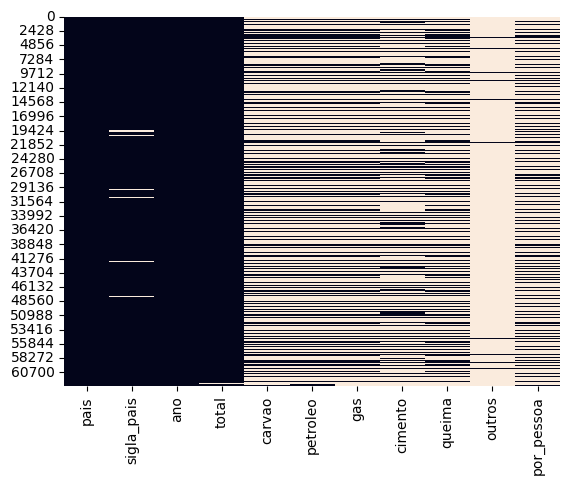

In [161]:
# Verificar os Missings
print(f"O df possui {df.shape[0]} linhas ")

df_missings(df)

print("\n --- Grafico de Missings por coluna ---")
sns.heatmap(df.isnull(), cbar=False)

### Colunas de emissão de CO2

In [162]:
# Analisando as colunas de emissão de co2 encontramos a maior parte dos missings 
# todos os missigs destas colunas vou transformar em 0
df[['total','carvao','petroleo','gas','cimento','queima','outros','por_pessoa']] = df[['total',
'carvao','petroleo','gas','cimento','queima','outros','por_pessoa']].fillna(0)
display(df)

,pais,sigla_pais,ano,total,carvao,petroleo,gas,cimento,queima,outros,por_pessoa
0,Afghanistan,AFG,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,AFG,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,AFG,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,AFG,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [163]:
# A coluna total corresponde ao valor total de emissão de co2 dentre demais categorias 
# Idei calcular uma outra coluna total para por isso em prova
df['total_calculado'] = df[['carvao','petroleo','gas','cimento','queima','outros']].sum(axis=1)
display(df[['total','total_calculado']])

,total,total_calculado
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
63099,36096.739276,36096.739276
63100,36826.506600,36826.506601
63101,37082.558969,37082.558969
63102,35264.085734,35264.085734


Irei Remover todas as linhas que não possui nenhuma emissão de CO2 ja que é muito improvavel que em 1 o pais não tenha emitido nenhuma emissão de CO2

In [164]:
# Verificando se existe algum valor que esteja calculado errado com uma tolerancia de 1
df[np.logical_not(np.isclose(df['total'], df['total_calculado'], rtol=0, atol=1))][['total','total_calculado']]

,total,total_calculado
62986,2279.748708,2277.914959
62987,2427.313197,2425.332746
62988,2534.734414,2532.607263
62989,2888.307767,2886.253967
62990,2776.404367,2774.570617
...,...,...
63067,20325.486795,20270.214490
63068,20627.358491,20567.709458
63069,21273.904184,21199.498192
63070,22107.794982,22018.632032


Ja que existe incoerencia no valor total irei desconciderar esta coluna e considerar apenas o total calculado

In [165]:
# Removendo coluna total
df.drop('total',axis=1, inplace=True)
df.head()

,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado
0,Afghanistan,AFG,1750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
# Remover todas as colunas que possui 0 na coluna total_calculado
df = df[df['total_calculado']>0]
df.head()

,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado
199,Afghanistan,AFG,1949,0.014656,0.000000,0.0,0.0,0.0,0.0,0.000000,0.014656
200,Afghanistan,AFG,1950,0.021068,0.063204,0.0,0.0,0.0,0.0,0.011266,0.084272
201,Afghanistan,AFG,1951,0.025648,0.065952,0.0,0.0,0.0,0.0,0.012098,0.091600
202,Afghanistan,AFG,1952,0.031708,0.059892,0.0,0.0,0.0,0.0,0.011946,0.091600
203,Afghanistan,AFG,1953,0.037949,0.068307,0.0,0.0,0.0,0.0,0.013685,0.106256


Analisando os missings faltantes


 --- Df dos Missings por coluna ---


,Colunas,Total na,Porcentagem na
0,pais,0,0.0%
1,sigla_pais,84,0.4%
2,ano,0,0.0%
3,carvao,0,0.0%
4,petroleo,0,0.0%
5,gas,0,0.0%
6,cimento,0,0.0%
7,queima,0,0.0%
8,outros,0,0.0%
9,por_pessoa,0,0.0%



 --- Grafico de Missings por coluna ---


<Axes: >

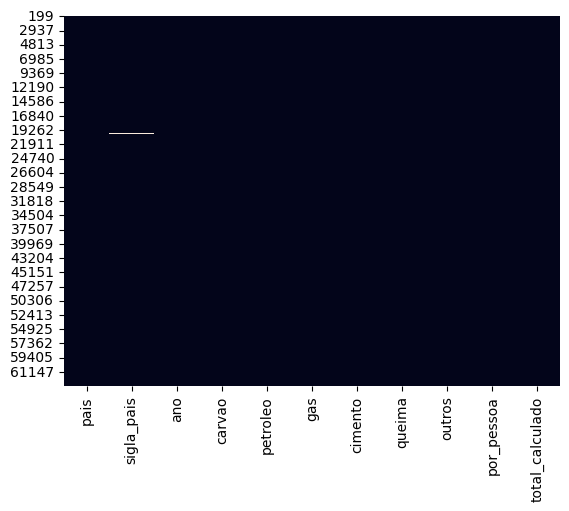

In [167]:
df_missings(df)

print("\n --- Grafico de Missings por coluna ---")
sns.heatmap(df.isnull(), cbar=False)


## Coluna sigla_pais

In [168]:
# Possui 84 missings na coluna de sigla_pais que corresponde a 2.6% do dataset
# Vamos verificar quais são esses paises
list_pais_onde_sigla_na = list(df[df['sigla_pais'].isnull()].pais.unique())
print(list_pais_onde_sigla_na)

['French Equatorial Africa', 'French West Africa', 'Kuwaiti Oil Fires', 'Leeward Islands', 'Pacific Islands (Palau)', 'Ryukyu Islands']


In [169]:
# Nesta lista de paises, nenhuma linha possui sua respectiva sigla?
df_filtred = df[df['pais'].isin(list_pais_onde_sigla_na)]
print(" --- Head dos paises que nao possui siglas ---\n")
display(df_filtred.head())

df_missings(df_filtred)

 --- Head dos paises que nao possui siglas ---



,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado
19512,French Equatorial Africa,NaN,1950,0.018320,0.157552,0.0,0.0,0.0,0.0,0.033574,0.175872
19513,French Equatorial Africa,NaN,1951,0.007328,0.227168,0.0,0.0,0.0,0.0,0.044320,0.234496
19514,French Equatorial Africa,NaN,1952,0.025648,0.278464,0.0,0.0,0.0,0.0,0.056706,0.304112
19515,French Equatorial Africa,NaN,1953,0.010992,0.245488,0.0,0.0,0.0,0.0,0.046701,0.256480
19516,French Equatorial Africa,NaN,1954,0.003664,0.267472,0.0,0.0,0.0,0.0,0.048331,0.271136



 --- Df dos Missings por coluna ---


,Colunas,Total na,Porcentagem na
0,pais,0,0.0%
1,sigla_pais,84,100.0%
2,ano,0,0.0%
3,carvao,0,0.0%
4,petroleo,0,0.0%
5,gas,0,0.0%
6,cimento,0,0.0%
7,queima,0,0.0%
8,outros,0,0.0%
9,por_pessoa,0,0.0%


Temos uma lista de 6 paises que nao possuem a sua sigla no formato ISO 3166-1 alpha-3

Farei uma pesquisa para encontrar suas respectivas siglas e completar no dataset 

**Resultado da pesquisa:**
- Pacific Islands (Palau): PLW

- French Equatorial Africa: não é mais um país
- French West Africa: não é mais um país
- Kuwaiti Oil Fires: não é um país
- Leeward Islands: não é um país
- Ryukyu Islands: não é um país

In [170]:
# Preencher a sigla_pais "PLW" do pais "Pacific Islands (Palau)"
# porem antes analisarei se existe a sigla PLW em meu dataset
df[df['sigla_pais']=="PLW"].head()

,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado
42402,Palau,PLW,1992,0.0,0.197856,0.0,0.0,0.0,0.0,12.362909,0.197856
42403,Palau,PLW,1993,0.0,0.197856,0.0,0.0,0.0,0.0,12.079121,0.197856
42404,Palau,PLW,1994,0.0,0.197856,0.0,0.0,0.0,0.0,11.798211,0.197856
42405,Palau,PLW,1995,0.0,0.197856,0.0,0.0,0.0,0.0,11.497240,0.197856
42406,Palau,PLW,1996,0.0,0.197856,0.0,0.0,0.0,0.0,11.158132,0.197856


Analisando este caso podemos observar que possui paises duplicados vamos tratar este caso


### País com duplicidade

In [171]:
# Criando uma lista com todos os paises do dataset
print(f"Quantidade de paises: {len(df.pais.unique())}")

Quantidade de paises: 232


São muitos paises para se analisar a duplicidade.

Existe uma biblioteca do python chamado pycountry

Com esta biblioteca posso criar uma outra coluna com o nome dos paises utilizando a sigla que esta no formato (ISO 3166-1 alpha-3) da coluna sigla.

Entrão os proximos passos são:
 - Organizar a coluna sigla
 - Deletar Coluna paises
 - Recriar coluna paises com o pycountry 

## Coluna sigla_pais (continuação)

In [172]:
# Preencher a sigla_pais "PLW" do pais "Pacific Islands (Palau)"
df.loc[df['pais']=='Pacific Islands (Palau)','sigla_pais'] = "PLW"
df[df['sigla_pais']=="PLW"].head()

,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado
41821,Pacific Islands (Palau),PLW,1955,0.0,0.010992,0.0,0.0,0.0,0.0,0.413755,0.010992
41822,Pacific Islands (Palau),PLW,1956,0.0,0.010992,0.0,0.0,0.0,0.0,0.405765,0.010992
41823,Pacific Islands (Palau),PLW,1957,0.0,0.014656,0.0,0.0,0.0,0.0,0.497742,0.014656
41824,Pacific Islands (Palau),PLW,1958,0.0,0.014656,0.0,0.0,0.0,0.0,0.488003,0.014656
41825,Pacific Islands (Palau),PLW,1959,0.0,0.014656,0.0,0.0,0.0,0.0,0.476393,0.014656


In [173]:
# Verificar quantas linhas nao possuem sigla_pais
df_sigla_na = df[df['sigla_pais'].isnull()]
print(f"Possui {df_sigla_na.shape[0]} linhas da coluna sigla_pais sem o preenchimento")

# Total de CO2
print(f"Estas linhas possui um total de {df_sigla_na['total_calculado'].sum().round(2)} Milhões de toneladas de CO2")

# Porcentagem
calculed = ((df_sigla_na['total_calculado'].sum() / df.total_calculado.sum())*100).round(3)
print(f"Isso representa {calculed}% de CO2 do dataset")


Possui 47 linhas da coluna sigla_pais sem o preenchimento
Estas linhas possui um total de 511.42 Milhões de toneladas de CO2
Isso representa 0.015% de CO2 do dataset


Ja que estas linhas representam apenas 0.015% de emissao de CO2 do dataset elas serão removidas 

In [174]:
df = df[df['sigla_pais'].isnull() ==False]
df_missings(df)


 --- Df dos Missings por coluna ---


,Colunas,Total na,Porcentagem na
0,pais,0,0.0%
1,sigla_pais,0,0.0%
2,ano,0,0.0%
3,carvao,0,0.0%
4,petroleo,0,0.0%
5,gas,0,0.0%
6,cimento,0,0.0%
7,queima,0,0.0%
8,outros,0,0.0%
9,por_pessoa,0,0.0%


# Tratar Nome dos paises

In [175]:
# Instalar pip do pycountry
# !pip install pycountry

In [176]:
# Importar pycountry
import pycountry

# Testando biblioteca
country = pycountry.countries.get(alpha_3='AFG')
print(country.name)

Afghanistan


In [177]:
# Visualizar pais formato anterior
df.head()

,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado
199,Afghanistan,AFG,1949,0.014656,0.000000,0.0,0.0,0.0,0.0,0.000000,0.014656
200,Afghanistan,AFG,1950,0.021068,0.063204,0.0,0.0,0.0,0.0,0.011266,0.084272
201,Afghanistan,AFG,1951,0.025648,0.065952,0.0,0.0,0.0,0.0,0.012098,0.091600
202,Afghanistan,AFG,1952,0.031708,0.059892,0.0,0.0,0.0,0.0,0.011946,0.091600
203,Afghanistan,AFG,1953,0.037949,0.068307,0.0,0.0,0.0,0.0,0.013685,0.106256


In [178]:
# Atualizar coluna Pais
pais_list = []
for cod in list(df['sigla_pais']):
  pais = pycountry.countries.get(alpha_3=cod)
  # Verificar se todos os codigos são validos
  if pais is not None:
    pais_list.append(pais.name)
  else: 
    pais_list.append('desconhecido')

df['pais_encontrado'] = pais_list
df.head()

<ipython-input-178-2b45c80e85d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pais_encontrado'] = pais_list


,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado,pais_encontrado
199,Afghanistan,AFG,1949,0.014656,0.000000,0.0,0.0,0.0,0.0,0.000000,0.014656,Afghanistan
200,Afghanistan,AFG,1950,0.021068,0.063204,0.0,0.0,0.0,0.0,0.011266,0.084272,Afghanistan
201,Afghanistan,AFG,1951,0.025648,0.065952,0.0,0.0,0.0,0.0,0.012098,0.091600,Afghanistan
202,Afghanistan,AFG,1952,0.031708,0.059892,0.0,0.0,0.0,0.0,0.011946,0.091600,Afghanistan
203,Afghanistan,AFG,1953,0.037949,0.068307,0.0,0.0,0.0,0.0,0.013685,0.106256,Afghanistan


In [179]:
# Veriricar se ouve pais com codigo desconhecido 
df[df.pais_encontrado == 'desconhecido']

,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado,pais_encontrado
18968,Panama Canal Zone,PCZ,1950,0.000000,0.186864,0.007328,0.000000,0.000000,0.000000,0.000000,0.194192,desconhecido
18969,Panama Canal Zone,PCZ,1951,0.000000,0.190528,0.007328,0.000000,0.000000,0.000000,0.000000,0.197856,desconhecido
18970,Panama Canal Zone,PCZ,1952,0.000000,0.183200,0.007328,0.000000,0.000000,0.000000,0.000000,0.190528,desconhecido
18971,Panama Canal Zone,PCZ,1953,0.000000,0.095517,0.007075,0.000000,0.000000,0.000000,0.000000,0.102592,desconhecido
18972,Panama Canal Zone,PCZ,1954,0.000000,0.080608,0.003664,0.000000,0.000000,0.000000,0.000000,0.084272,desconhecido
...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682,36096.739276,desconhecido
63100,Global,WLD,2018,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753,36826.506601,desconhecido
63101,Global,WLD,2019,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633,37082.558969,desconhecido
63102,Global,WLD,2020,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423,35264.085734,desconhecido


Encontrado 388 paises com siglas não validas vamos ver quais são esses paises 

In [180]:
df[df.pais_encontrado == 'desconhecido'].pais.unique()

array(['Panama Canal Zone', 'Kosovo', 'International Transport', 'Global'],
      dtype=object)

Temos uma lista de 4 casos:

**Panama Canal Zone**: Não é mais uma entidade política independente e não possui um código oficial na norma ISO 3166-1.

**Kosovo**: estado com reconhecimento limitado e atualmente não possui um código ISO 3166-1 alpha-3 oficial

**International Transport**: Não é um pais

**Global**: Não é um pais (O valor Global sera calculado com base ao dataframe após a limpeza)

In [181]:
# Filtrar apenas um df com os paises desconhecidos removendo o que for "global"
df_filtred = df[(df.pais_encontrado == 'desconhecido') & (df.pais != "Global")].total_calculado.sum()

# Total de CO2
print(f"Em International Transport possui um total de {df_filtred.round(2)} Milhões de toneladas de CO2")

# Porcentagem
calculed = ((df_filtred / df.total_calculado.sum())*100).round(3)
print(f"Isso representa {calculed}% de CO2 do dataset")

Em International Transport possui um total de 43188.74 Milhões de toneladas de CO2
Isso representa 1.244% de CO2 do dataset


Após analisar uma baixa representatividade de emissão de CO2 das linhas que não representão paises, cheguei a conclusão que é melhor remover estas linhas  

In [182]:
df = df[df['pais_encontrado'] != "desconhecido"]
df.head()

,pais,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado,pais_encontrado
199,Afghanistan,AFG,1949,0.014656,0.000000,0.0,0.0,0.0,0.0,0.000000,0.014656,Afghanistan
200,Afghanistan,AFG,1950,0.021068,0.063204,0.0,0.0,0.0,0.0,0.011266,0.084272,Afghanistan
201,Afghanistan,AFG,1951,0.025648,0.065952,0.0,0.0,0.0,0.0,0.012098,0.091600,Afghanistan
202,Afghanistan,AFG,1952,0.031708,0.059892,0.0,0.0,0.0,0.0,0.011946,0.091600,Afghanistan
203,Afghanistan,AFG,1953,0.037949,0.068307,0.0,0.0,0.0,0.0,0.013685,0.106256,Afghanistan


In [183]:
# Transformar pais_encontrado em pais e remover duplicidade de coluna
df = df.drop('pais',axis=1)
df = df.rename(columns={'pais_encontrado':'pais'})

df.head()

,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado,pais
199,AFG,1949,0.014656,0.000000,0.0,0.0,0.0,0.0,0.000000,0.014656,Afghanistan
200,AFG,1950,0.021068,0.063204,0.0,0.0,0.0,0.0,0.011266,0.084272,Afghanistan
201,AFG,1951,0.025648,0.065952,0.0,0.0,0.0,0.0,0.012098,0.091600,Afghanistan
202,AFG,1952,0.031708,0.059892,0.0,0.0,0.0,0.0,0.011946,0.091600,Afghanistan
203,AFG,1953,0.037949,0.068307,0.0,0.0,0.0,0.0,0.013685,0.106256,Afghanistan


# Limpeza dos Outliers


In [184]:
df.head()

,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado,pais
199,AFG,1949,0.014656,0.000000,0.0,0.0,0.0,0.0,0.000000,0.014656,Afghanistan
200,AFG,1950,0.021068,0.063204,0.0,0.0,0.0,0.0,0.011266,0.084272,Afghanistan
201,AFG,1951,0.025648,0.065952,0.0,0.0,0.0,0.0,0.012098,0.091600,Afghanistan
202,AFG,1952,0.031708,0.059892,0.0,0.0,0.0,0.0,0.011946,0.091600,Afghanistan
203,AFG,1953,0.037949,0.068307,0.0,0.0,0.0,0.0,0.013685,0.106256,Afghanistan


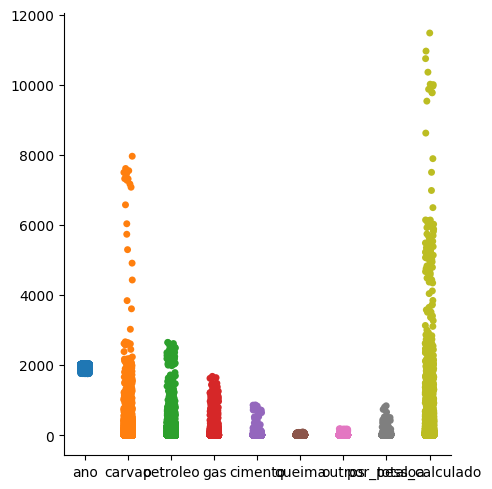

In [185]:
# Visualizar adistribuição de todo os floats do dataset
sns.catplot(df)

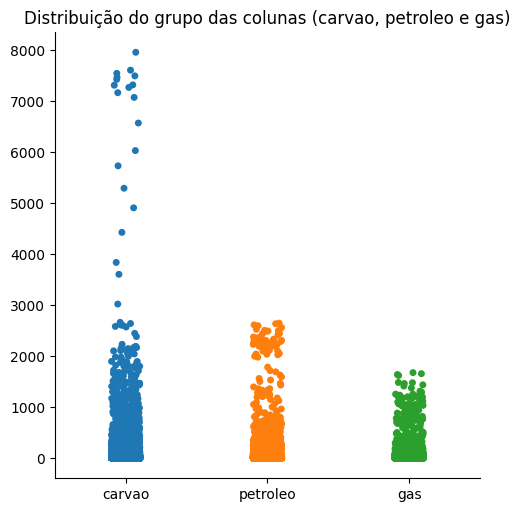

In [186]:
# Separando em grupos para uma melhor visualização
sns.catplot(df[['carvao','petroleo','gas']]).set(title="Distribuição do grupo das colunas (carvao, petroleo e gas)")

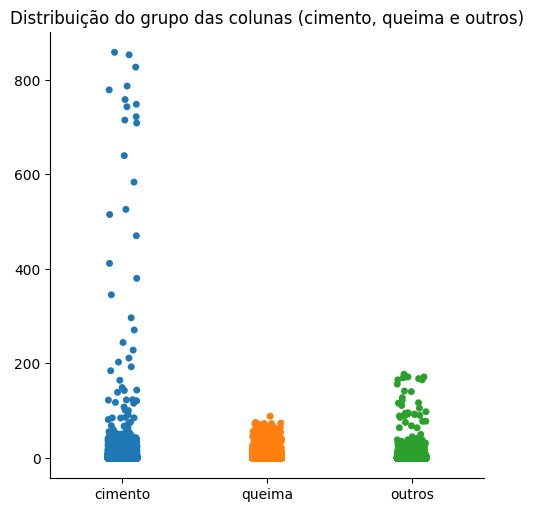

In [187]:
sns.catplot(df[['cimento','queima','outros']]).set(title="Distribuição do grupo das colunas (cimento, queima e outros)")

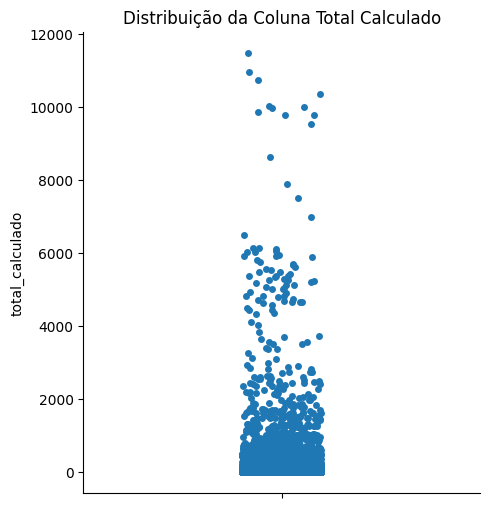

In [188]:
sns.catplot(df.total_calculado).set(title="Distribuição da Coluna Total Calculado")

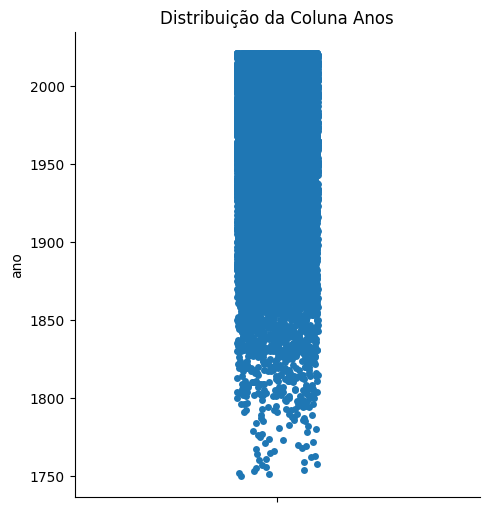

In [189]:
sns.catplot(df.ano).set(title='Distribuição da Coluna Anos')

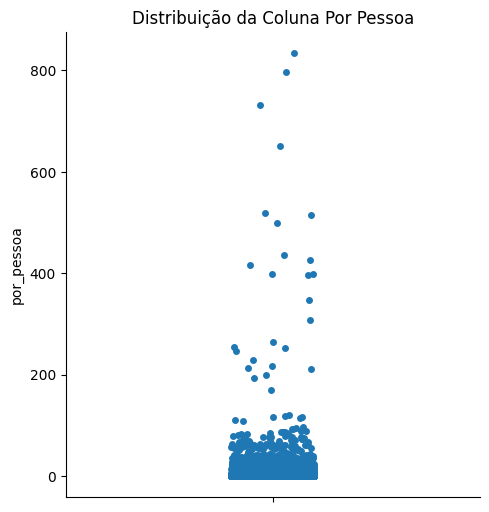

In [190]:
sns.catplot(df.por_pessoa).set(title='Distribuição da Coluna Por Pessoa')

Talves exista Outliers na coluna "por_pessoa" vamos analisa-la

[Text(0.5, 1.0, 'Distribuição da Coluna Por Pessoa')]

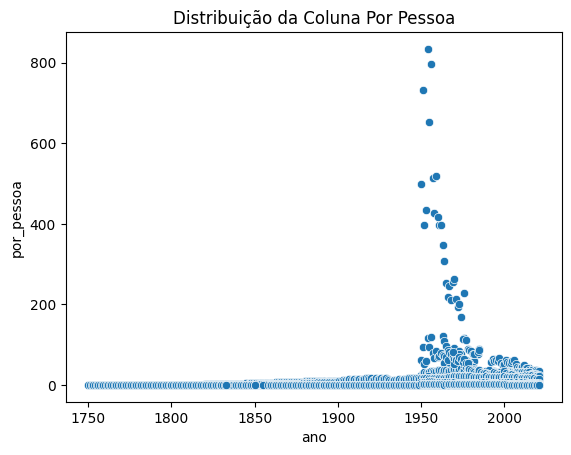

In [193]:
sns.scatterplot(x='ano',y='por_pessoa',data=df).set(title='Distribuição da Coluna Por Pessoa')

[Text(0.5, 1.0, 'Distribuição da Coluna Por Pessoa')]

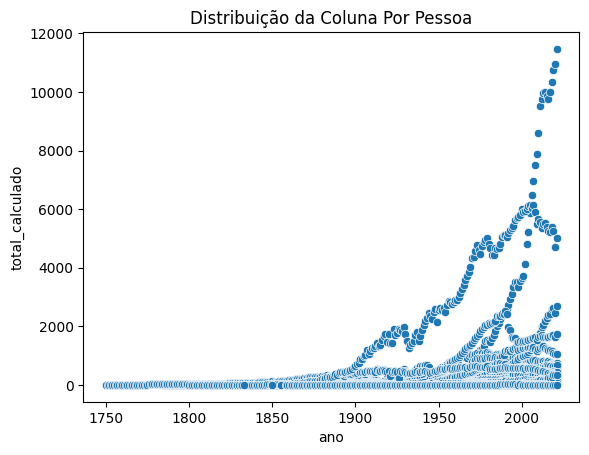

In [194]:
sns.scatterplot(x='ano',y='total_calculado',data=df).set(title='Distribuição da Coluna Por Pessoa')

In [203]:
df[df['por_pessoa']>500]

,sigla_pais,ano,carvao,petroleo,gas,cimento,queima,outros,por_pessoa,total_calculado,pais
48616,SXM,1950,0.0,0.729008,0.0,0.0,0.0,0.0,500.005475,0.729008,Sint Maarten (Dutch part)
48617,SXM,1951,0.0,1.149743,0.0,0.0,0.0,0.0,731.854547,1.149743,Sint Maarten (Dutch part)
48620,SXM,1954,0.0,1.554101,0.0,0.0,0.0,0.0,834.192642,1.554101,Sint Maarten (Dutch part)
48621,SXM,1955,0.0,1.285500,0.0,0.0,0.0,0.0,651.545792,1.285500,Sint Maarten (Dutch part)
48622,SXM,1956,0.0,1.662560,0.0,0.0,0.0,0.0,796.626925,1.662560,Sint Maarten (Dutch part)
48623,SXM,1957,0.0,1.135549,0.0,0.0,0.0,0.0,514.521581,1.135549,Sint Maarten (Dutch part)
48625,SXM,1959,0.0,1.280404,0.0,0.0,0.0,0.0,518.382362,1.280404,Sint Maarten (Dutch part)


O pais com maior emissão de CO2 por pessoa é "Sint Maarten (Dutch part)" Trata-se de um pequeno país constituinte localizado no Mar do Caribe com aproximadamente 43.000 pessoas, logo este dado não se trata de um erro no dataset seu valor é plausivel e não sera descartado.

Apos Avaliar os possiveis outliers cheguei a conclusão que nenhum dado sera auterado para não perder a integridade do dataset, não foi localizado nenhum dado que possa poluir nossos estudos.

# Analise de dados

In [ ]:
# Vamos descobrir a taxa de crescimento da emissão global e gerar uma previsão
# Vamos ranquear os 10 paises que mais emitem 
# Vamos ranquear os 10 paises que mais emitem por pessoa
# Vamos plotar o mapa do mundo com grafico de calor de emissão por tipo de emissao 